In [35]:
print('ok')

ok


In [78]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Define possible file paths
path1 = r"C:\Users\TPWODL\New folder_Content\TimeSeriesForecasting_End_To_End\data\raw\Energy Demand Forcasting.csv"
path2 = r"C:\Users\LENOVO\MachineLearningProhects\TimeSeriesForecasting_End_To_End\data\raw\Energy Demand Forcasting.csv"

# Check which path exists and read CSV
if os.path.exists(path1):
    df = pd.read_csv(path1)
elif os.path.exists(path2):
    df = pd.read_csv(path2)
else:
    raise FileNotFoundError("❌ No valid data file found in either specified path.")

In [38]:
df

,date,megawatthours
0,2015-07-01 05:00:00,162827
1,2015-07-01 06:00:00,335153
2,2015-07-01 07:00:00,333837
3,2015-07-01 08:00:00,398386
4,2015-07-01 09:00:00,388954
...,...,...
58931,2022-03-21 16:00:00,433344
58932,2022-03-21 17:00:00,429156
58933,2022-03-21 18:00:00,426496
58934,2022-03-21 19:00:00,423393


In [43]:
# Load your data
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

In [44]:
df

,date,megawatthours
0,2015-07-01 05:00:00,162827
1,2015-07-01 06:00:00,335153
2,2015-07-01 07:00:00,333837
3,2015-07-01 08:00:00,398386
4,2015-07-01 09:00:00,388954
...,...,...
58931,2022-03-21 16:00:00,433344
58932,2022-03-21 17:00:00,429156
58933,2022-03-21 18:00:00,426496
58934,2022-03-21 19:00:00,423393


In [50]:
df.isnull().sum()

date             0
megawatthours    0
dtype: int64

In [47]:
# Use megawatt_hours as target variable
ts_data = df['megawatthours'].values
dates = df['date'].values

In [48]:
ts_data

array([162827, 335153, 333837, ..., 426496, 423393, 420157],
      shape=(58936,))

In [49]:
dates

array(['2015-07-01T05:00:00.000000000', '2015-07-01T06:00:00.000000000',
       '2015-07-01T07:00:00.000000000', ...,
       '2022-03-21T18:00:00.000000000', '2022-03-21T19:00:00.000000000',
       '2022-03-21T20:00:00.000000000'],
      shape=(58936,), dtype='datetime64[ns]')

In [51]:
# Split into train and test (80-20 split)
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]
train_dates = dates[:train_size]
test_dates = dates[train_size:]

In [52]:
train


array([162827, 335153, 333837, ..., 363067, 376277, 385544],
      shape=(47148,))

In [53]:
test

array([392412, 397779, 400668, ..., 426496, 423393, 420157],
      shape=(11788,))

In [54]:
train_dates

array(['2015-07-01T05:00:00.000000000', '2015-07-01T06:00:00.000000000',
       '2015-07-01T07:00:00.000000000', ...,
       '2020-11-15T14:00:00.000000000', '2020-11-15T15:00:00.000000000',
       '2020-11-15T16:00:00.000000000'],
      shape=(47148,), dtype='datetime64[ns]')

In [55]:
test_dates

array(['2020-11-15T17:00:00.000000000', '2020-11-15T18:00:00.000000000',
       '2020-11-15T19:00:00.000000000', ...,
       '2022-03-21T18:00:00.000000000', '2022-03-21T19:00:00.000000000',
       '2022-03-21T20:00:00.000000000'],
      shape=(11788,), dtype='datetime64[ns]')

In [56]:
print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 47148, Test size: 11788


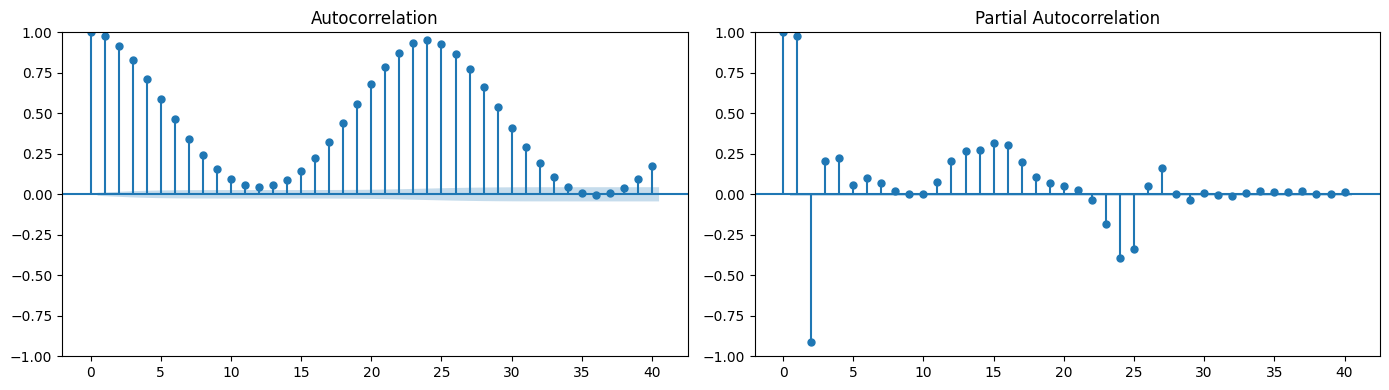

In [57]:
# ARIMA model - Since data is already stationary, use (p,0,q)
# Determine optimal p and q using ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(train, lags=40, ax=axes[0])
plot_pacf(train, lags=40, ax=axes[1])
plt.tight_layout()
plt.savefig('acf_pacf.png', dpi=100)
plt.show()

In [58]:
# Fit ARIMA model with d=0 (data is stationary)
# Adjust (p, d, q) based on ACF/PACF plots
arima_model = ARIMA(train, order=(2, 0, 2))
arima_result = arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                47148
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -474079.947
Date:                Tue, 21 Oct 2025   AIC                         948171.894
Time:                        01:32:42   BIC                         948224.461
Sample:                             0   HQIC                        948188.405
                              - 47148                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.549e+05    951.667    478.027      0.000    4.53e+05    4.57e+05
ar.L1          1.8144      0.001   1272.992      0.000       1.812       1.817
ar.L2         -0.8583      0.001   -644.550      0.0

In [59]:
# Make predictions on test set
test_predictions = arima_result.get_forecast(steps=len(test)).predicted_mean
mae_test = mean_absolute_error(test, test_predictions)
rmse_test = np.sqrt(mean_squared_error(test, test_predictions))
print(f"\nTest MAE: {mae_test:.2f}, Test RMSE: {rmse_test:.2f}")


Test MAE: 51599.50, Test RMSE: 68076.29


In [60]:
# Forecast next 30 days (720 hours)
forecast_steps = 720  # 30 days * 24 hours
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()


In [61]:
# Generate future dates
last_date = pd.to_datetime(df['date'].iloc[-1])
future_dates = pd.date_range(start=last_date + pd.Timedelta(hours=1), 
                              periods=forecast_steps, freq='H')

In [62]:
last_date

Timestamp('2022-03-21 20:00:00')

In [63]:
future_dates

DatetimeIndex(['2022-03-21 21:00:00', '2022-03-21 22:00:00',
               '2022-03-21 23:00:00', '2022-03-22 00:00:00',
               '2022-03-22 01:00:00', '2022-03-22 02:00:00',
               '2022-03-22 03:00:00', '2022-03-22 04:00:00',
               '2022-03-22 05:00:00', '2022-03-22 06:00:00',
               ...
               '2022-04-20 11:00:00', '2022-04-20 12:00:00',
               '2022-04-20 13:00:00', '2022-04-20 14:00:00',
               '2022-04-20 15:00:00', '2022-04-20 16:00:00',
               '2022-04-20 17:00:00', '2022-04-20 18:00:00',
               '2022-04-20 19:00:00', '2022-04-20 20:00:00'],
              dtype='datetime64[ns]', length=720, freq='h')

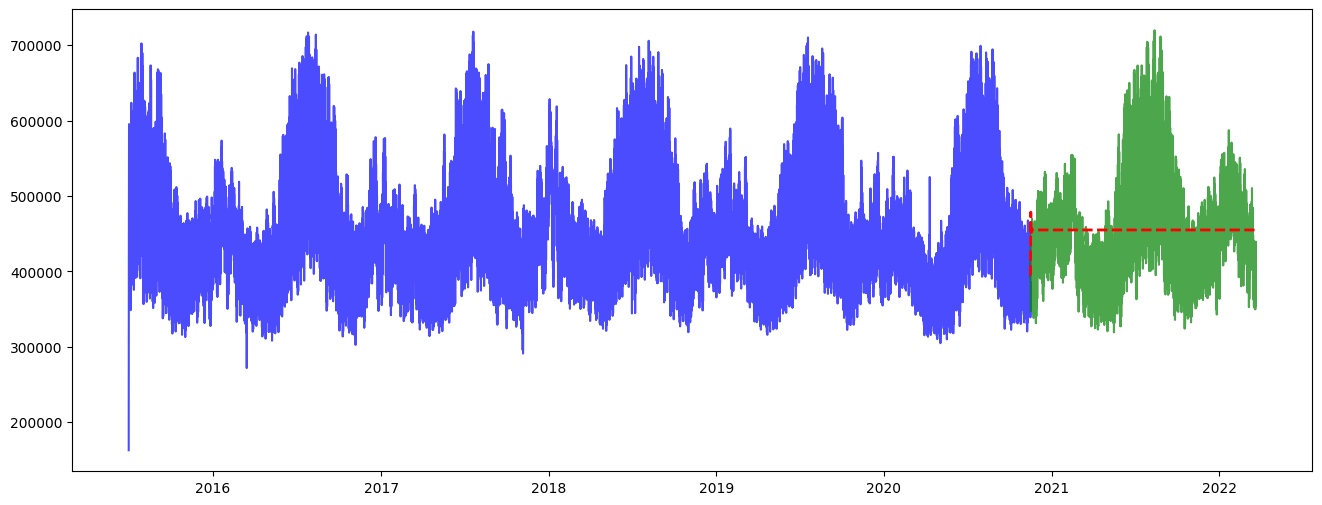

In [70]:
# Plot results
fig, ax = plt.subplots(figsize=(16, 6))

# Historical data
ax.plot(train_dates, train, label='Training Data', color='blue', alpha=0.7)
ax.plot(test_dates, test, label='Test Data', color='green', alpha=0.7)
ax.plot(test_dates, test_predictions, label='Test Predictions', 
        color='red', linestyle='--', linewidth=2)

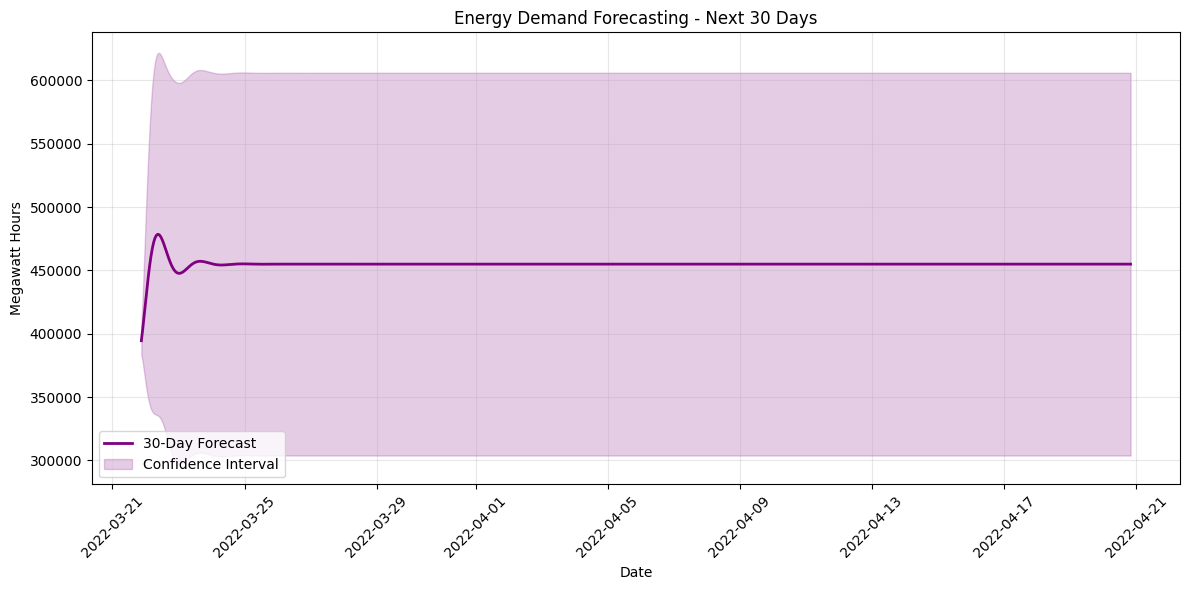

In [81]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(future_dates, forecast_values, label='30-Day Forecast', color='purple', linewidth=2)
ax.fill_between(future_dates, forecast_ci[:, 0], forecast_ci[:, 1], color='purple', alpha=0.2, label='Confidence Interval')

ax.set_xlabel('Date')
ax.set_ylabel('Megawatt Hours')
ax.set_title('Energy Demand Forecasting - Next 30 Days')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('forecast_30days.png', dpi=100)
plt.show()


In [83]:
forecast_df = pd.DataFrame({
    'datetime': future_dates,
    'forecast': forecast_values,                # <-- removed .values
    'lower_ci': forecast_ci[:, 0],              # <-- changed from .iloc to array slicing
    'upper_ci': forecast_ci[:, 1]
})

In [102]:
forecast_df

,datetime,forecast,lower_ci,upper_ci,date
0,2022-03-21 21:00:00,394489.252171,383467.630848,405510.873494,2022-03-21
1,2022-03-21 22:00:00,403744.831115,377525.760348,429963.901882,2022-03-21
2,2022-03-21 23:00:00,413938.137235,369532.704989,458343.569481,2022-03-21
3,2022-03-22 00:00:00,424488.392997,361548.097382,487428.688611,2022-03-22
4,2022-03-22 01:00:00,434881.412905,354392.185311,515370.640500,2022-03-22
...,...,...,...,...,...
715,2022-04-20 16:00:00,454922.806715,303849.011579,605996.601851,2022-04-20
716,2022-04-20 17:00:00,454922.806715,303849.011579,605996.601851,2022-04-20
717,2022-04-20 18:00:00,454922.806715,303849.011579,605996.601851,2022-04-20
718,2022-04-20 19:00:00,454922.806715,303849.011579,605996.601851,2022-04-20


In [88]:
# Daily aggregation
forecast_df['date'] = forecast_df['datetime'].dt.date
daily_forecast = forecast_df.groupby('date')[['forecast', 'lower_ci', 'upper_ci']].sum()
daily_forecast.columns = ['daily_forecast_mwh', 'lower_bound', 'upper_bound']

In [89]:
print("\n30-Day Daily Forecast:")
print(daily_forecast)



30-Day Daily Forecast:
            daily_forecast_mwh   lower_bound   upper_bound
date                                                      
2022-03-21        1.212172e+06  1.130526e+06  1.293818e+06
2022-03-22        1.105662e+07  7.848717e+06  1.426452e+07
2022-03-23        1.089224e+07  7.274221e+06  1.451027e+07
2022-03-24        1.091304e+07  7.287476e+06  1.453859e+07
2022-03-25        1.091850e+07  7.292734e+06  1.454427e+07
2022-03-26        1.091830e+07  7.292528e+06  1.454407e+07
2022-03-27        1.091815e+07  7.292377e+06  1.454392e+07
2022-03-28        1.091814e+07  7.292372e+06  1.454391e+07
2022-03-29        1.091815e+07  7.292376e+06  1.454392e+07
2022-03-30        1.091815e+07  7.292376e+06  1.454392e+07
2022-03-31        1.091815e+07  7.292376e+06  1.454392e+07
2022-04-01        1.091815e+07  7.292376e+06  1.454392e+07
2022-04-02        1.091815e+07  7.292376e+06  1.454392e+07
2022-04-03        1.091815e+07  7.292376e+06  1.454392e+07
2022-04-04        1.091815e+07  

In [90]:
# Save results
forecast_df.to_csv('hourly_forecast_30days.csv', index=False)
daily_forecast.to_csv('daily_forecast_30days.csv')
print("\nForecast saved to hourly_forecast_30days.csv and daily_forecast_30days.csv")


Forecast saved to hourly_forecast_30days.csv and daily_forecast_30days.csv


In [94]:
# ====== DAILY FORECAST VISUALIZATION & COMPARISON ======
# Calculate daily historical consumption
df['date'] = pd.to_datetime(df['date']).dt.date
daily_historical = df.groupby('date')['megawatthours'].sum().reset_index()
daily_historical.columns = ['date', 'actual_mwh']

In [95]:
# Get last 30 days of historical data for comparison
last_30_days = daily_historical.tail(30).copy()
last_30_days['type'] = 'Historical (Last 30 Days)'


In [96]:
# Prepare forecast data
forecast_comparison = daily_forecast.reset_index()
forecast_comparison.columns = ['date', 'actual_mwh', 'lower_bound', 'upper_bound']
forecast_comparison['date'] = pd.to_datetime(forecast_comparison['date'])
forecast_comparison['type'] = 'Forecast (Next 30 Days)'

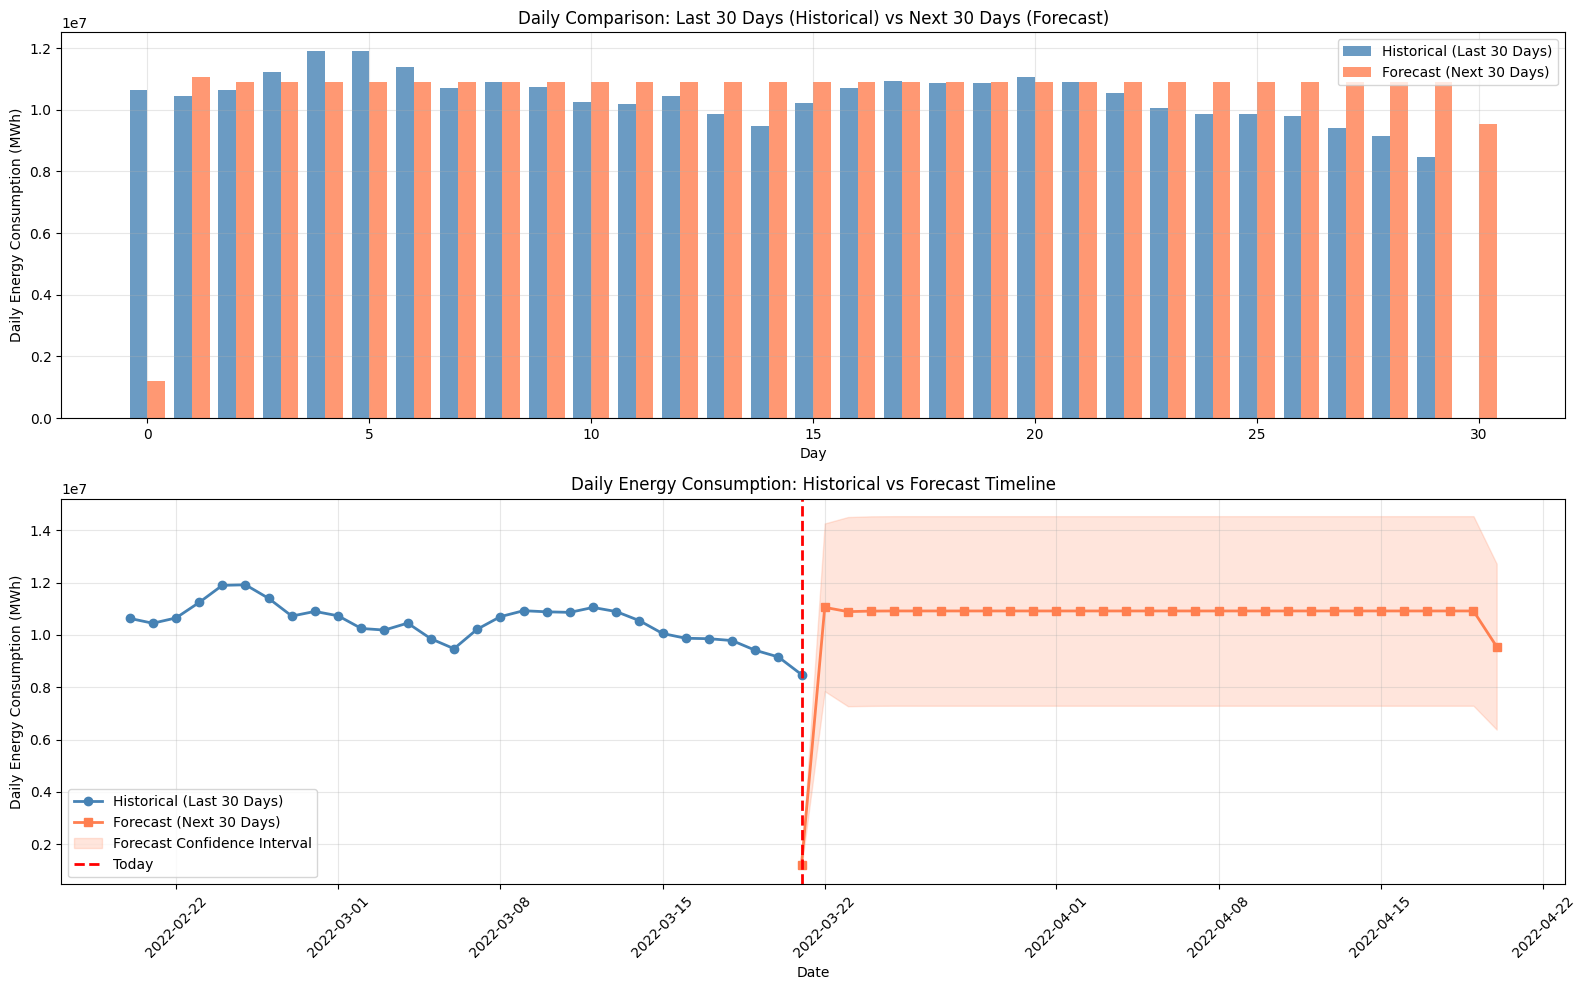

In [97]:
# Plot 1: Daily Forecast vs Last 30 Days Comparison
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Top plot: Side-by-side comparison
ax1 = axes[0]
x_hist = np.arange(len(last_30_days))
x_forecast = np.arange(len(forecast_comparison))

ax1.bar(x_hist - 0.2, last_30_days['actual_mwh'], width=0.4, 
        label='Historical (Last 30 Days)', color='steelblue', alpha=0.8)
ax1.bar(x_forecast + 0.2, forecast_comparison['actual_mwh'], width=0.4,
        label='Forecast (Next 30 Days)', color='coral', alpha=0.8)

ax1.set_xlabel('Day')
ax1.set_ylabel('Daily Energy Consumption (MWh)')
ax1.set_title('Daily Comparison: Last 30 Days (Historical) vs Next 30 Days (Forecast)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom plot: Time series with confidence intervals
ax2 = axes[1]
historical_dates = pd.to_datetime(last_30_days['date'])
forecast_dates = forecast_comparison['date']

ax2.plot(historical_dates, last_30_days['actual_mwh'], 
         marker='o', label='Historical (Last 30 Days)', color='steelblue', linewidth=2)
ax2.plot(forecast_dates, forecast_comparison['actual_mwh'], 
         marker='s', label='Forecast (Next 30 Days)', color='coral', linewidth=2)
ax2.fill_between(forecast_dates, forecast_comparison['lower_bound'], 
                  forecast_comparison['upper_bound'], 
                  color='coral', alpha=0.2, label='Forecast Confidence Interval')

ax2.axvline(x=historical_dates.iloc[-1], color='red', linestyle='--', 
            linewidth=2, label='Today')
ax2.set_xlabel('Date')
ax2.set_ylabel('Daily Energy Consumption (MWh)')
ax2.set_title('Daily Energy Consumption: Historical vs Forecast Timeline')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('daily_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

In [98]:
stats_comparison = pd.DataFrame({
    'Metric': ['Mean (MWh)', 'Median (MWh)', 'Std Dev (MWh)', 
               'Min (MWh)', 'Max (MWh)', 'Total (MWh)'],
    'Last 30 Days (Historical)': [
        last_30_days['actual_mwh'].mean(),
        last_30_days['actual_mwh'].median(),
        last_30_days['actual_mwh'].std(),
        last_30_days['actual_mwh'].min(),
        last_30_days['actual_mwh'].max(),
        last_30_days['actual_mwh'].sum()
    ],
    'Next 30 Days (Forecast)': [
        forecast_comparison['actual_mwh'].mean(),
        forecast_comparison['actual_mwh'].median(),
        forecast_comparison['actual_mwh'].std(),
        forecast_comparison['actual_mwh'].min(),
        forecast_comparison['actual_mwh'].max(),
        forecast_comparison['actual_mwh'].sum()
    ]
})

In [99]:
stats_comparison['% Change'] = ((stats_comparison['Next 30 Days (Forecast)'] - 
                                  stats_comparison['Last 30 Days (Historical)']) / 
                                 stats_comparison['Last 30 Days (Historical)'] * 100)

print(stats_comparison.to_string(index=False))
print("="*60)

# Week-over-week comparison
print("\nWEEK-BY-WEEK COMPARISON")
print("="*60)

       Metric  Last 30 Days (Historical)  Next 30 Days (Forecast)   % Change
   Mean (MWh)               1.044979e+07             1.056451e+07   1.097840
 Median (MWh)               1.059155e+07             1.091815e+07   3.083546
Std Dev (MWh)               7.610126e+05             1.753202e+06 130.377582
    Min (MWh)               8.483307e+06             1.212172e+06 -85.711089
    Max (MWh)               1.191926e+07             1.105662e+07  -7.237380
  Total (MWh)               3.134936e+08             3.274998e+08   4.467768

WEEK-BY-WEEK COMPARISON


In [100]:
# Historical weeks
last_30_days['week'] = (last_30_days.index // 7) + 1
weekly_hist = last_30_days.groupby('week')['actual_mwh'].sum()

# Forecast weeks
forecast_comparison['week'] = (forecast_comparison.index // 7) + 1
weekly_forecast = forecast_comparison.groupby('week')['actual_mwh'].sum()

week_comparison = pd.DataFrame({
    'Week': range(1, 5),
    'Historical (MWh)': weekly_hist.values[:4] if len(weekly_hist) >= 4 else list(weekly_hist.values) + [np.nan]*(4-len(weekly_hist)),
    'Forecast (MWh)': weekly_forecast.values[:4] if len(weekly_forecast) >= 4 else list(weekly_forecast.values) + [np.nan]*(4-len(weekly_forecast))
})
week_comparison['Difference (MWh)'] = week_comparison['Forecast (MWh)'] - week_comparison['Historical (MWh)']
week_comparison['% Change'] = (week_comparison['Difference (MWh)'] / week_comparison['Historical (MWh)'] * 100)


In [101]:
print(week_comparison.to_string(index=False))
print("="*60)

 Week  Historical (MWh)  Forecast (MWh)  Difference (MWh)   % Change
    1          31734697    6.682902e+07      3.509432e+07 110.586594
    2          78815082    7.642703e+07     -2.388054e+06  -3.029946
    3          71139230    7.642703e+07      5.287802e+06   7.433032
    4          75230694    7.642703e+07      1.196338e+06   1.590225
